# Raw data preparation

This notebook explains the data pre-processing pipeline on the public EURO 2020 dataset provided by StatsBomb. The following steps are performed:

- Create a local SQlite database for storing the data
- Convert StatsBomb events to SPADL actions
- Store SPADL actions and metadata in SQLite database


In [1]:
from pathlib import Path

In [2]:
# Disable private API warnings
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.filterwarnings(action="ignore", category=NoAuthWarning, module='statsbombpy')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from unxpass.databases import SQLiteDatabase
from unxpass.visualization import plot_action

## Configure leagues and seasons to download and convert

First, we define the StatsBomb IDs of the competitions and seasons that should be downloaded.

In [5]:
datasets = [
    # Full EURO 2020 dataset
    # { "getter": "remote", "competition_id":  55, "season_id": 43 }
    # BEL v ITA at EURO2020 (enable for a quick test run)
    { "getter": "remote", "competition_id":  55, "season_id": 43, "game_id": 3795107 }
    # You can also import a local dataset
    #{ "getter": "local", "root": "../raw_data", "competition_id":  55, "season_id": 43 }
]

## Configure database

Next, we define were the processed data should be stored.

In [6]:
DB_PATH = Path("../stores/database.sqlite")
db = SQLiteDatabase(DB_PATH)

## Import data

Now we can download, convert and save each dataset.

In [7]:
for dataset in datasets:
    db.import_data(**dataset)

Loading game data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

## Access data

The SQLite database now provides an interface for conveniently accessing the data.

In [8]:
# List of games included in the database
df_games = db.games()
df_games.head()

,season_id,competition_id,game_day,game_date,home_team_id,away_team_id,competition_stage,home_score,away_score,venue,referee
game_id,,,,,,,,,,,
3788741,43,55,1,2021-06-11 21:00:00,909,914,Group Stage,0,3,Estadio Olímpico,Danny Desmond Makkelie
3788742,43,55,1,2021-06-12 18:00:00,776,1835,Group Stage,0,1,Parken,Anthony Taylor
3788743,43,55,1,2021-06-12 21:00:00,782,796,Group Stage,3,0,Saint-Petersburg Stadium,Antonio Miguel Mateu Lahoz
3788744,43,55,1,2021-06-12 15:00:00,907,773,Group Stage,1,1,Bakı Olimpiya Stadionu,Clément Turpin
3788745,43,55,1,2021-06-13 15:00:00,768,785,Group Stage,1,0,Wembley Stadium,Daniele Orsato


In [9]:
# Dataframe with all SPADL actions + 360 snapshots for a particular game
df_actions = db.actions(game_id=3795107)
df_actions.head()

original_event_id  period_id  \
game_id action_id                                                    
3795107 0          cac7b0b7-e051-4266-874a-37d5185c8a4e          1   
        1          5c1ef827-e053-44f8-a0f0-b312a3ca093d          1   
        2          ba26ec0b-3274-481c-90d1-c58bd71bc81f          1   
        3          1783a21c-bb70-4353-bed4-5883f66a1f68          1   
        4          f8b6772a-4272-4aa1-8eda-184d2a8248a8          1   

                   time_seconds  team_id  player_id    start_x    start_y  \
game_id action_id                                                           
3795107 0                   1.0      782       3289  52.058824  34.430380   
        1                   1.0      782       5642  46.941176  37.615190   
        2                   2.0      782       5642  44.470588  39.853165   
        3                   4.0      782       3077  29.205882  53.797468   
        4                   6.0      782       3077  28.235294  56.207595   

                       end_x      end_y  bodypart_id  type_id  result_id  \
game_id action_id                                                          
3795107 0          46.941176  37.615190            5        0          1   
        1          44.470588  39.853165            0       21          1   
        2          29.205882  53.797468            5        0          1   
        3          28.235294  56.207595            0       21          1   
        4          35.382353  67.483544            4        0          1   

                   possession_team_id play_pattern_name  under_pressure  \
game_id action_id                                                         
3795107 0                       782.0     From Kick Off               0   
        1                       782.0     From Kick Off               0   
        2                       782.0     From Kick Off               0   
        3                       782.0     From Kick Off               0   
        4                       782.0     From Kick Off               0   

                                                               extra  \
game_id action_id                                                      
3795107 0          {'pass': {'recipient': {'id': 5642, 'name': 'A...   
        1                  {'carry': {'end_location': [51.4, 33.7]}}   
        2          {'pass': {'recipient': {'id': 3077, 'name': 'J...   
        3                  {'carry': {'end_location': [33.0, 14.7]}}   
        4          {'pass': {'recipient': {'id': 5632, 'name': 'T...   

                                                    visible_area_360  \
game_id action_id                                                      
3795107 0          [[39.95293111994783, 2.994426202079026], [9.12...   
        1          [[40.54724912231884, 3.620299352250072], [11.6...   
        2          [[38.72217799304041, 0.04784815699034084], [8....   
        3          [[36.00339793873086, 3.8648379122013665], [6.9...   
        4          [[33.14790413631122, 6.700149200225219], [2.90...   

                   in_visible_area_360  \
game_id action_id                        
3795107 0                            1   
        1                            1   
        2                            1   
        3                            1   
        4                            1   

                                                    freeze_frame_360  
game_id action_id                                                     
3795107 0          [{'teammate': True, 'actor': False, 'keeper': ...  
        1          [{'teammate': True, 'actor': False, 'keeper': ...  
        2          [{'teammate': True, 'actor': False, 'keeper': ...  
        3          [{'teammate': True, 'actor': False, 'keeper': ...  
        4          [{'teammate': True, 'actor': False, 'keeper': ...

<AxesSubplot:>

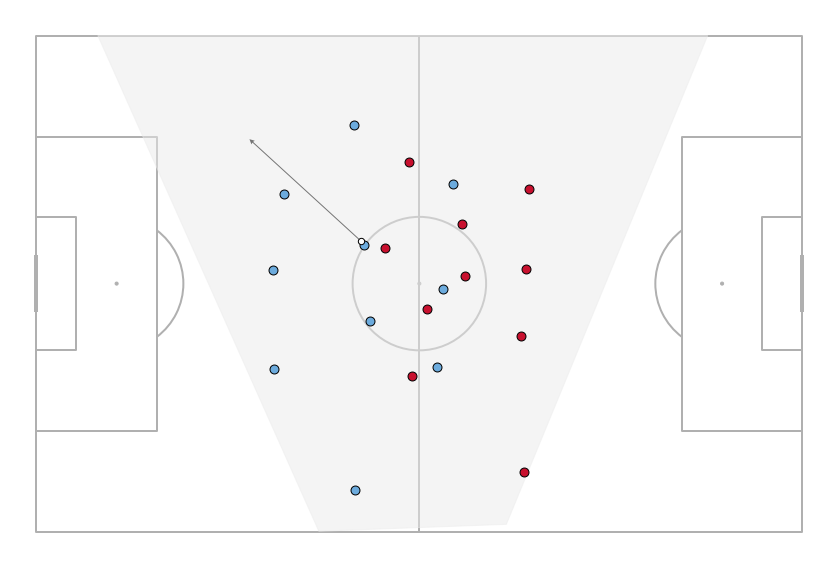

In [10]:
sample = (3795107, 2)
plot_action(df_actions.loc[sample])

In [11]:
db.close()